Proposal codes

In [2]:
library(tidyverse)
library(readxl)
library(ggplot2)
library(gridExtra)
library(repr)
#install.packages("psych")
library(psych)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
# show data can be read
options(repr.plot.width = 15, repr.plot.height = 10)

train_data <- read_excel("Data_User.xls", sheet="Training_Data") |>
              select(STG:UNS)
test_data <- read_excel("Data_User.xls", sheet="Test_Data") |>
              select(STG:UNS)


#tidy data: turn UNS into factors in both sets of data, then turn to numeric levels starting at 1 for very_low
#clean and wrangle data
#turn class levels to 1,2,3,4 (very low, low, middle, high)
train_data_cleaned<- train_data |>
mutate(UNS = as.factor(UNS))
#mutate(UNS = as.numeric(UNS)) 

#test_data_cleaned <- test_data |>
#mutate(UNS = factor(as.factor(UNS), levels=(rev(levels(as.factor(UNS)))))) |>
#mutate(UNS = as.factor(as.numeric(UNS)))

class(train_data_cleaned$UNS)
head(train_data)
head(train_data_cleaned)

New names:
• `` -> `...7`
• `` -> `...8`
New names:
• `` -> `...7`
• `` -> `...8`


[1] "factor"

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


In [ ]:
#Summary table for predictors in train-data
summary_pred_train <- describe(train_data[-6], fast=TRUE)
summary_pred_train

In [ ]:
#visualizing training data (histogram)
# plots showing distribution of each predictor: 

prawSTG <- ggplot(train_data, aes(STG))+
geom_histogram(colour="black", fill="lightblue", bins=30)

prawSCG <- ggplot(train_data, aes(SCG))+
geom_histogram(colour="black", fill="lightblue")

prawSTR <- ggplot(train_data, aes(STR))+
geom_histogram(colour="black", fill="lightblue")

prawLPR <- ggplot(train_data, aes(LPR))+
geom_histogram(colour="black", fill="lightblue")

prawPEG <- ggplot(train_data, aes(PEG))+
geom_histogram(colour="black", fill="lightblue")

grid.arrange(prawSTG, prawSCG, prawSTR, prawLPR, prawPEG, ncol=3, top="Distribution of predictors")


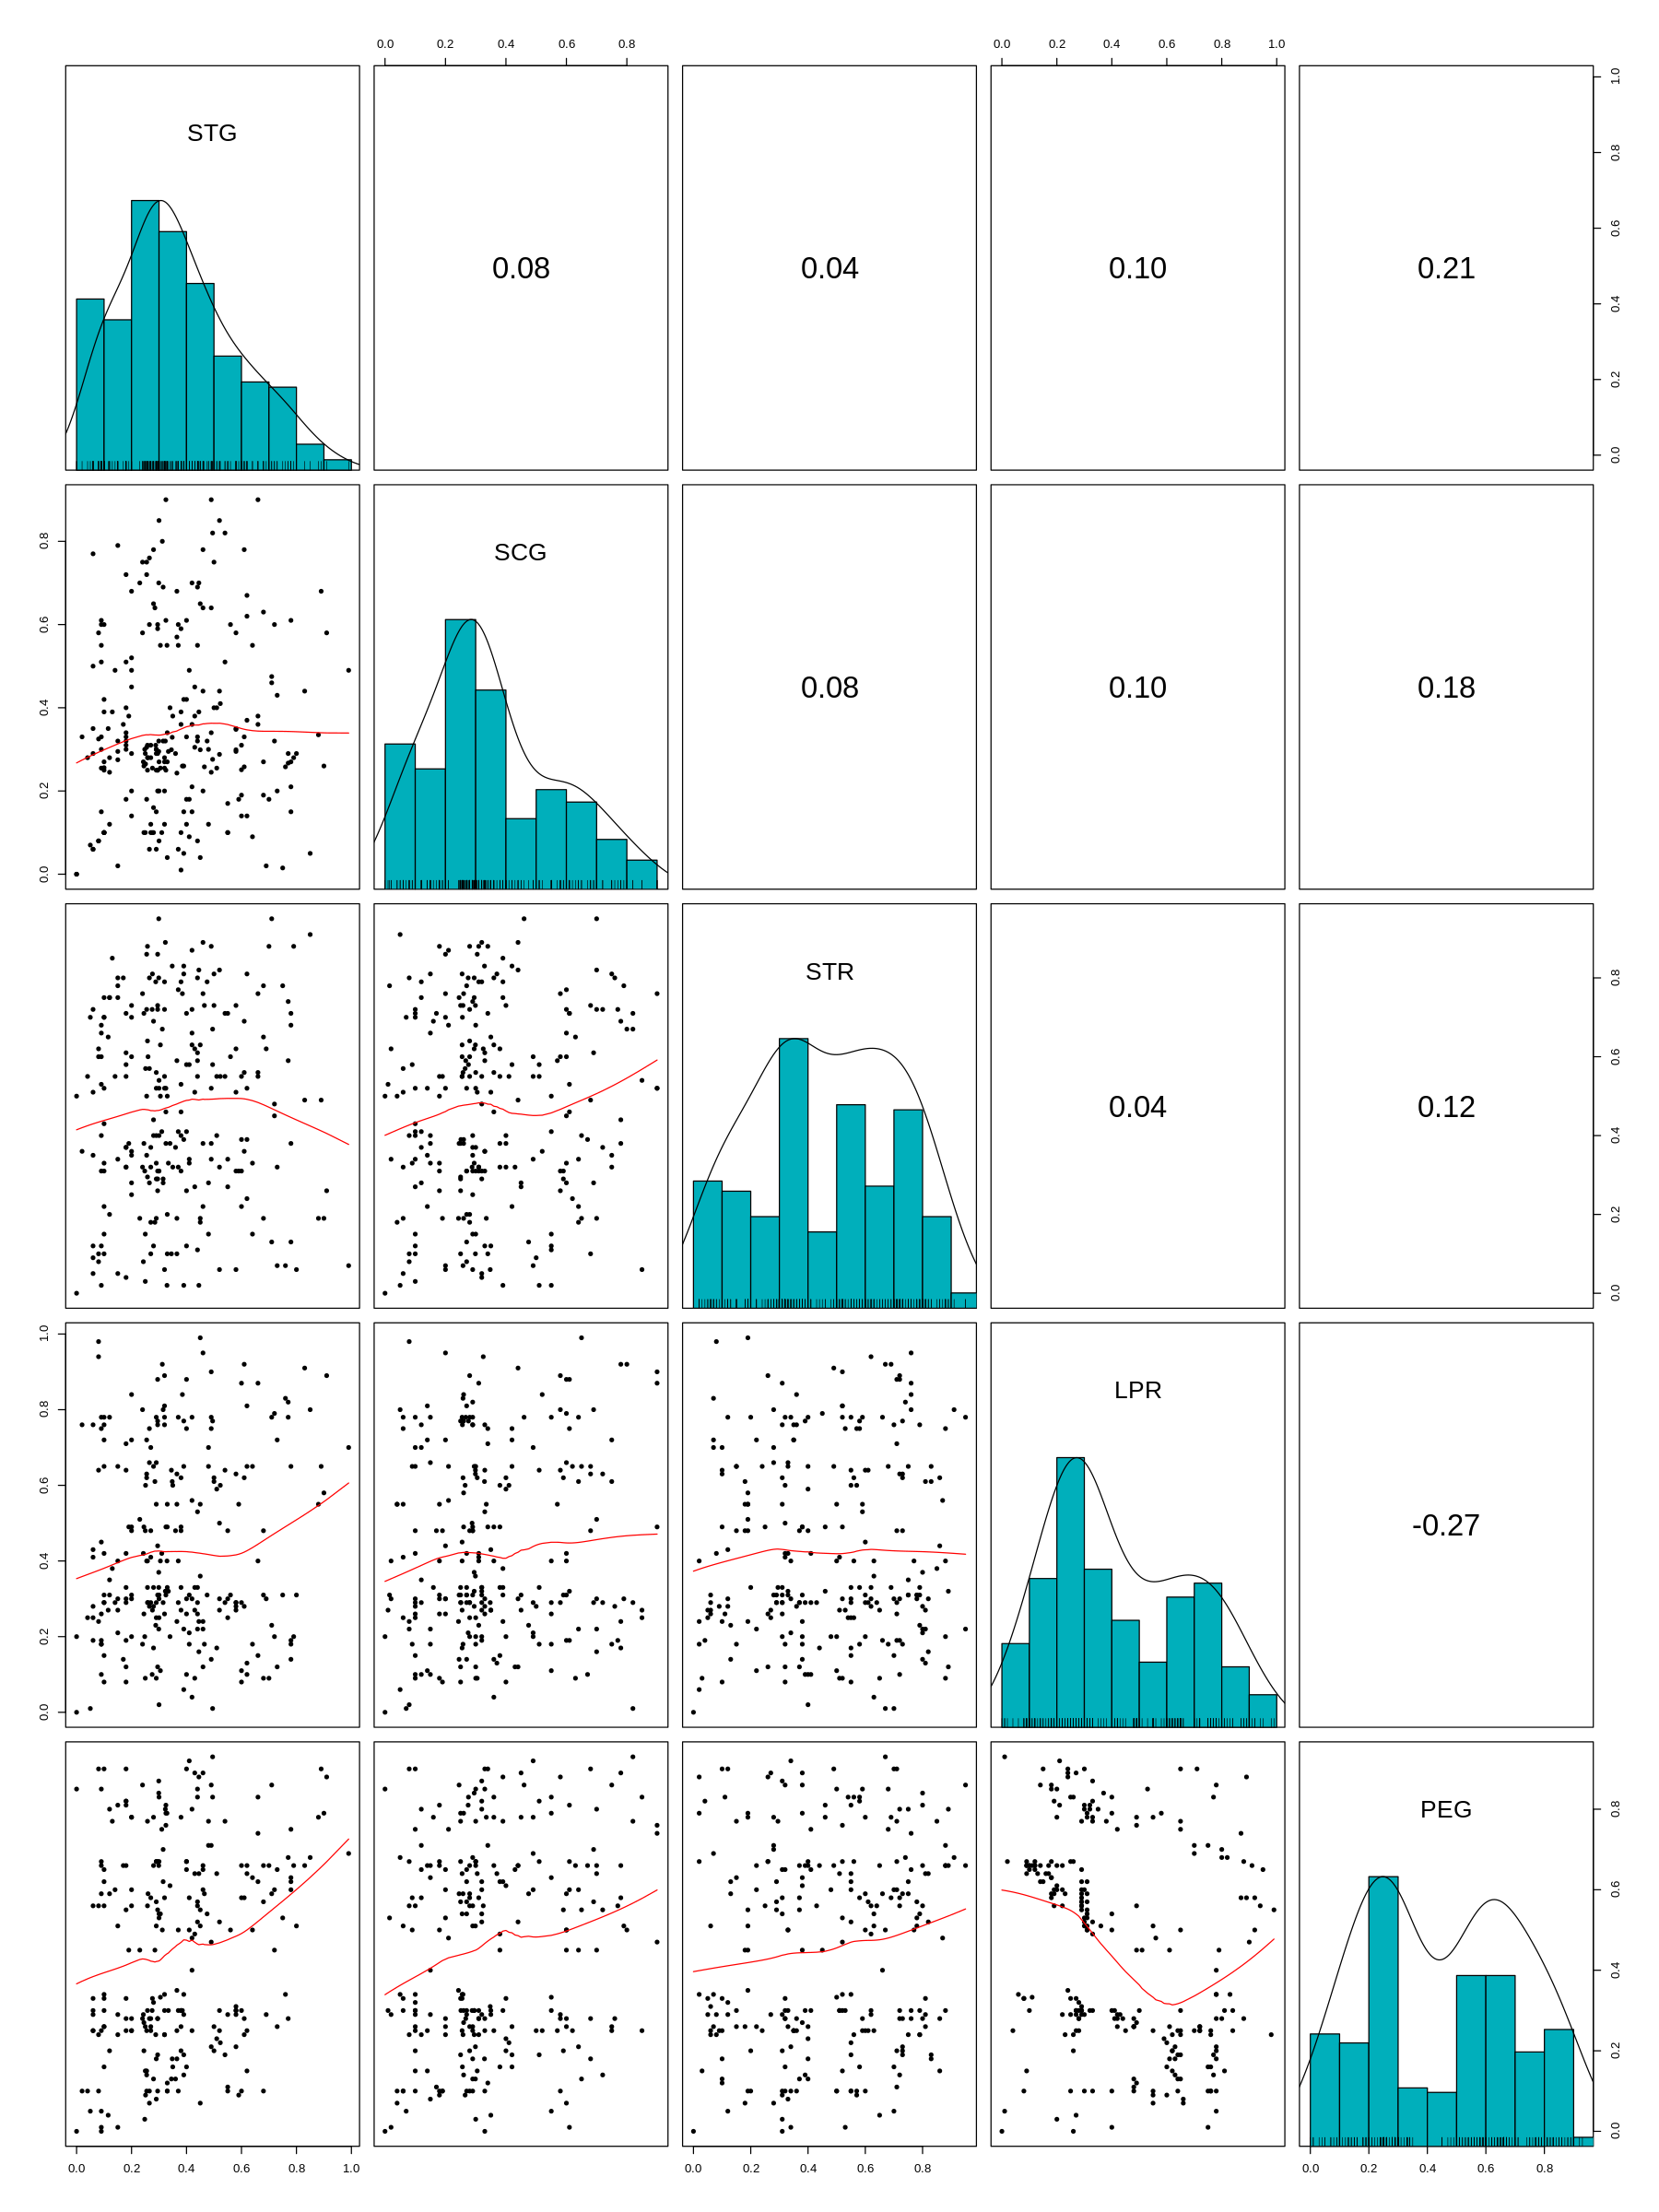

In [35]:
pairs.panels(train_data[,-6], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = FALSE # show correlation ellipses
             )

Warning message in warn_if_args_exist(list(...)):
“Extra arguments: 'colums' are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



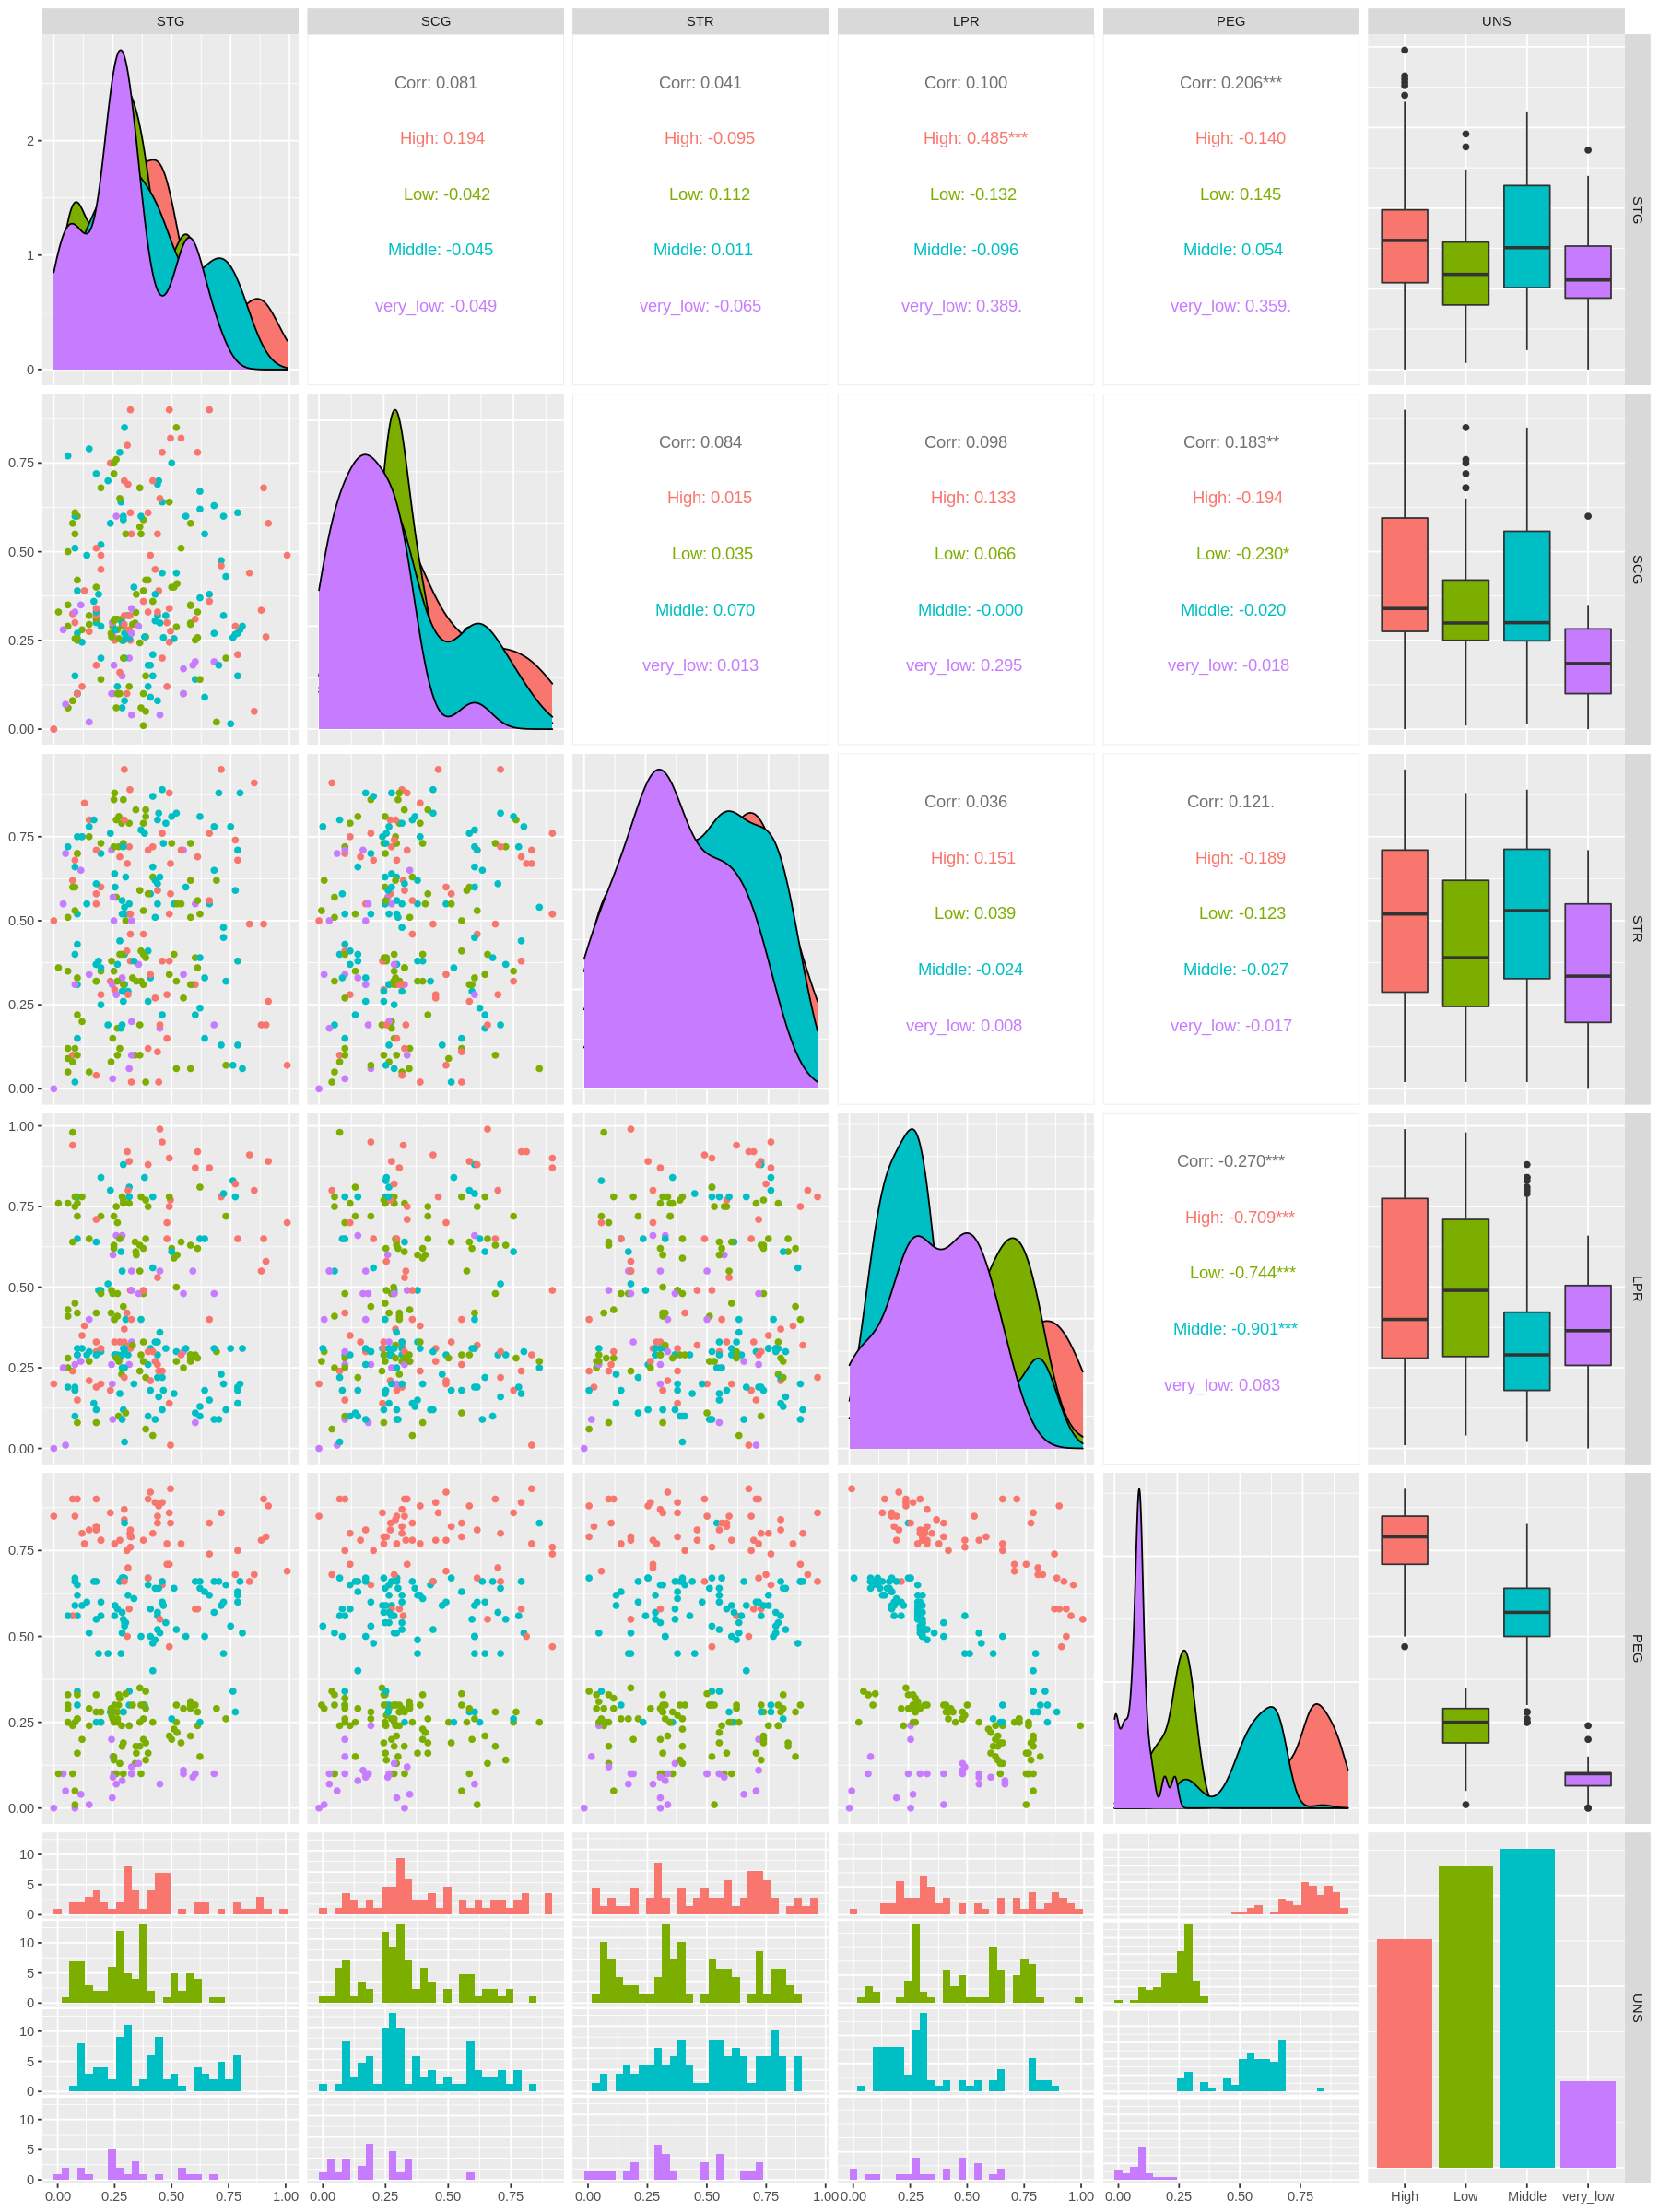

In [36]:

ggpairs(train_data, colums=1:5, aes(color=UNS))
        